<a href="https://colab.research.google.com/github/Yenuli0808/CM2604_Telco_Customer_Churn-CW/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
# **CM2604 Machine Learning Coursework**
Telco Customer Churn Prediction

Student Name: Yenuli Sooriyaarachchi

RGU ID:2425432

Student ID: 20241268

GitHub: https://github.com/Yenuli0808/CM2604_Telco_Customer_Churn-CW.git

"""

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [64]:
# Download the dataset
!wget -q https://raw.githubusercontent.com/Yenuli0808/CM2604_Telco_Customer_Churn-CW/refs/heads/main/data/Wk_Fs-UaKC_Telco-Customer-Churn.csv

# Load the data
df = pd.read_csv('Telco-Customer-Churn.csv')

print("✅ Dataset loaded successfully!")
print("\n=== Data set overview ===")
print(f"Dataset shape: {df.shape}")  # (rows, columns)

✅ Dataset loaded successfully!

=== Data set overview ===
Dataset shape: (7043, 21)


In [16]:
# First look at the data
print("==== FIRST 5 ROWS ====\n")
display(df.head())

==== FIRST 5 ROWS ====



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
print("==== BASIC INFO ====")
df.info()

==== BASIC INFO ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [18]:
print("==== MISSING VALUES ====\n")
print(df.isnull().sum())

==== MISSING VALUES ====

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [26]:
print("==== DUPLICATE ROWS ====\n")
print(df.duplicated().sum())

==== DUPLICATE ROWS ====

0


In [27]:
print("==== UNIQUE VALUES ====\n")
print(df.nunique())

==== UNIQUE VALUES ====

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [43]:
print("==== TARGET BALANCE ====\n")
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True)


==== TARGET BALANCE ====



,proportion
Churn,
0,0.734215
1,0.265785


==== First Plot ====



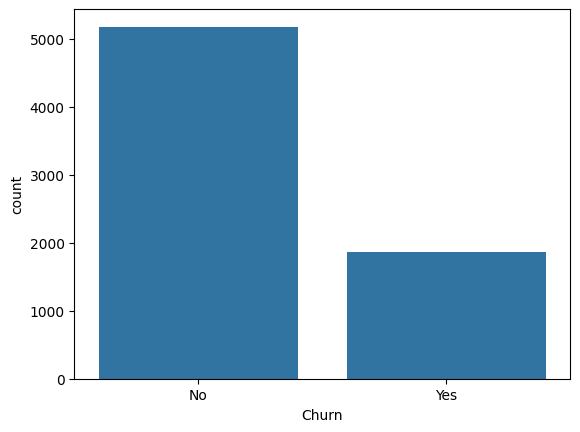

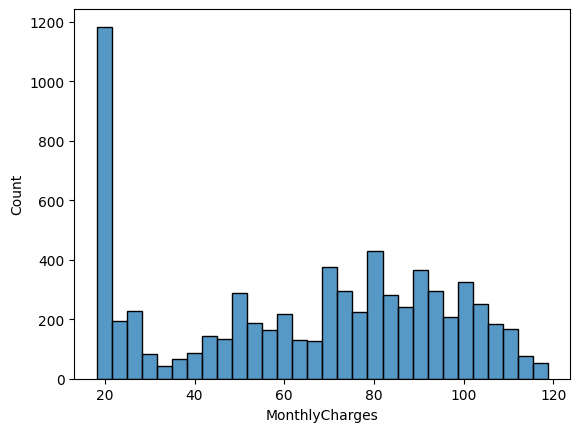

In [30]:
print("==== First Plot ====\n")

sns.countplot(x='Churn', data=df)
plt.show()

sns.histplot(df['MonthlyCharges'],bins=30)
plt.show()

# Initial Findings

*   Dataset contains 7043 rows and 21 columns
*   Churn is imbalced : approx 26% Yes and 74% No

*   Monthly charges is roughly normally distributed
*   No critical missing values except TotalCharges

*   No Duplicate values








In [36]:
#Fix Total Charges

#Converting to numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#checking how many become NaN
df['TotalCharges'].isna().sum()

np.int64(11)

In [40]:
#Handling Missing TotalCharges

#Dropping raws where total charge is NaN
df = df.dropna(subset=['TotalCharges'])
print(f"Dataset shape(new): {df.shape}")

Dataset shape(new): (7032, 21)


In [59]:
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [63]:
df.sample(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
322,Male,0,0,0,1,1,No,DSL,No,No,No,No,No,No,Month-to-month,1,Electronic check,44.80,44.80,0
4734,Male,0,1,1,39,1,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,0,Credit card (automatic),80.00,3182.95,1
829,Male,0,1,1,34,0,No phone service,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,1,Electronic check,44.85,1442.60,0
5211,Female,0,1,0,8,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,84.90,764.95,1
4329,Female,0,1,1,17,1,Yes,Fiber optic,Yes,No,Yes,No,Yes,No,Month-to-month,0,Electronic check,94.40,1607.20,1
4931,Male,0,1,0,15,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,103.45,1539.80,0
5002,Female,0,1,1,69,0,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,1,Credit card (automatic),43.95,2960.10,0
4676,Male,0,0,1,19,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Electronic check,20.00,377.55,0
6749,Male,0,1,0,70,1,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,One year,0,Bank transfer (automatic),79.40,5528.90,0
1180,Male,0,0,0,39,1,No,DSL,No,No,No,Yes,No,No,Two year,1,Bank transfer (automatic),49.80,1971.15,0


In [41]:
#Converting churn to numeric(0/1)

df['Churn'] = df['Churn'].map({'No': 0,'Yes': 1})
df['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [44]:
# Dropping CustomerID (as it's not useful for modeling)

df = df.drop(columns=['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [61]:
# Converting Yes/No Columns To 0/1

# 1) Finding yes/no columns
binary_cols = [col for col in df.columns
               if df[col].nunique() == 2 and
               sorted(df[col].unique().tolist()) == ['No','Yes']]

print(binary_cols)

#2) converting them to 0/1
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1,'No': 0})

df.head(20)



[]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [62]:
# Saving Clean DataSet

df.to_csv('Cleaned_Telco_Customer_Churn.csv', index=False)
print("✅ Cleaned dataset saved successfully!")
df.head(20)

✅ Cleaned dataset saved successfully!


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


# Cleaning Summary

*   Converted Total charges to numeric and remove 11 invalid rows
*   Removed Customer ID as it's not usefull
*   Converted churn to 0/1
*   Converted yes/no columns to binary
*   Saved clean data set for modeling





